# Open Exploration

## Imports

In [3]:
# Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import networkx as nx
import scipy as sp

# Workbench Imports
from ema_workbench import (Model, Policy, MultiprocessingEvaluator, ScalarOutcome, RealParameter, IntegerParameter, CategoricalParameter, optimize, Scenario, Constant, ema_logging,perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.em_framework.samplers import sample_levers, sample_uncertainties
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS, SequentialEvaluator, BaseEvaluator


ema_logging.log_to_stderr(ema_logging.INFO)


E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Logger EMA (DEBUG)>

## Model Specification

In [3]:
# Model Imports
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation

dike_model, time_step = get_model_for_problem_formulation(8)

We specify a reference policy, where no measures are implemented to assess the impacts of such inaction. 

In [4]:
policy_noaction = Policy("NoAction",  
                    **{'0_RfR 0': 0, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 0, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 0, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 0, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 0, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 0, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 0, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 0, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 0, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 0, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  0   })

In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=50, policies=policy_noaction)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments


In [ ]:
#Save the results
save_results([experiments, outcomes], "../results/500Scenarios_NoAction_PF8.tar.gz")

In [4]:
experiments, outcomes = load_results("../results/500Scenarios_NoAction_PF1.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\Samuel\Desktop\Studies\EPA\EPA1361 - Model Based Decision Making\model-based-decision-making\results\500Scenarios_NoAction_PF1.tar.gz


In [5]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,81.0,30.765126,10.0,0.049163,284.214119,10.0,0.219579,205.965912,10.0,0.424718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500,NoAction,dikesnet
1,83.0,348.235539,1.5,0.139901,148.988985,10.0,0.858069,178.232704,1.5,0.899932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501,NoAction,dikesnet
2,120.0,260.085105,1.0,0.036259,76.536959,1.5,0.706167,52.690804,10.0,0.789754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502,NoAction,dikesnet
3,5.0,105.843638,1.0,0.945293,321.010694,1.0,0.872246,184.011399,1.0,0.459339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503,NoAction,dikesnet
4,132.0,283.537649,1.0,0.803705,60.928597,10.0,0.939601,176.271379,1.5,0.827799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504,NoAction,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74.0,53.434024,10.0,0.711326,213.869033,1.5,0.790120,264.342026,1.5,0.853177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995,NoAction,dikesnet
496,75.0,162.737822,10.0,0.725747,162.208587,1.5,0.400758,148.695267,1.5,0.205531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996,NoAction,dikesnet
497,5.0,336.733383,1.5,0.387155,84.848185,1.5,0.649180,179.350052,1.0,0.647326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,997,NoAction,dikesnet
498,26.0,287.778369,1.5,0.743320,189.706002,1.0,0.785774,303.325681,1.5,0.906462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998,NoAction,dikesnet


In [7]:
pd.DataFrame(outcomes)

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,2.539169e+09,0.0,2.062327
1,2.821783e+09,0.0,1.749610
2,2.383714e+09,0.0,1.716772
3,2.806400e+08,0.0,0.433114
4,1.077430e+08,0.0,0.140720
...,...,...,...
495,1.367312e+08,0.0,0.193467
496,1.955809e+09,0.0,2.529515
497,8.364746e+08,0.0,0.836279
498,5.674316e+08,0.0,0.482021


In [4]:
outcomes_df = pd.DataFrame(data=outcomes)

In [5]:
outcomes_df.describe()

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
count,5.000000e+02,500.0,500.000000
mean,1.689879e+09,0.0,1.623775
std,1.149775e+09,0.0,1.125255
min,7.766960e+07,0.0,0.066551
25%,6.270852e+08,0.0,0.663196
50%,1.744672e+09,0.0,1.727227
75%,2.543655e+09,0.0,2.111926
max,5.698826e+09,0.0,5.286185


In [50]:
results_df = pd.concat([experiments,outcomes_df], axis = 1)

In [55]:
results_df

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths,Total Expected Annual Damage,Total Expected Number of Deaths
0,81.0,30.765126,10.0,0.049163,284.214119,10.0,0.219579,205.965912,10.0,0.424718,...,0.0,0.0,500,NoAction,dikesnet,2.539169e+09,0.0,2.062327,5.078339e+09,4.124655
1,83.0,348.235539,1.5,0.139901,148.988985,10.0,0.858069,178.232704,1.5,0.899932,...,0.0,0.0,501,NoAction,dikesnet,2.821783e+09,0.0,1.749610,5.643567e+09,3.499220
2,120.0,260.085105,1.0,0.036259,76.536959,1.5,0.706167,52.690804,10.0,0.789754,...,0.0,0.0,502,NoAction,dikesnet,2.383714e+09,0.0,1.716772,4.767428e+09,3.433545
3,5.0,105.843638,1.0,0.945293,321.010694,1.0,0.872246,184.011399,1.0,0.459339,...,0.0,0.0,503,NoAction,dikesnet,2.806400e+08,0.0,0.433114,5.612799e+08,0.866228
4,132.0,283.537649,1.0,0.803705,60.928597,10.0,0.939601,176.271379,1.5,0.827799,...,0.0,0.0,504,NoAction,dikesnet,1.077430e+08,0.0,0.140720,2.154859e+08,0.281439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74.0,53.434024,10.0,0.711326,213.869033,1.5,0.790120,264.342026,1.5,0.853177,...,0.0,0.0,995,NoAction,dikesnet,1.367312e+08,0.0,0.193467,2.734624e+08,0.386934
496,75.0,162.737822,10.0,0.725747,162.208587,1.5,0.400758,148.695267,1.5,0.205531,...,0.0,0.0,996,NoAction,dikesnet,1.955809e+09,0.0,2.529515,3.911617e+09,5.059029
497,5.0,336.733383,1.5,0.387155,84.848185,1.5,0.649180,179.350052,1.0,0.647326,...,0.0,0.0,997,NoAction,dikesnet,8.364746e+08,0.0,0.836279,1.672949e+09,1.672557
498,26.0,287.778369,1.5,0.743320,189.706002,1.0,0.785774,303.325681,1.5,0.906462,...,0.0,0.0,998,NoAction,dikesnet,5.674316e+08,0.0,0.482021,1.134863e+09,0.964041


In [14]:
def aggregate_outcomes(results, outcome):
    '''
    This function creates a new column in the given dataframe with the aggregated scores. It does it inplace. 
    Parameters
    ----------
    results : dataframe 
    outcome : str
    '''

    list_outcomes_columns = []

    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

In [54]:
# Create an aggregate score of the outcomes over location and time, some visualizations only work on the total score.

aggregate_outcomes(results_df, "Expected Annual Damage")
aggregate_outcomes(results_df, "Expected Number of Deaths")

# 2. Data Visualization of the base case

### Preprocess of results

In [59]:
n_policies = 1
n_scenarios = len(experiments) / n_policies

policies = np.empty([len(experiments), 1])
k = 0
l = n_scenarios
for i in range (len(experiments)) : 
    policies[i] = k
    if (i == l - 1) : 
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

#### Heatmap

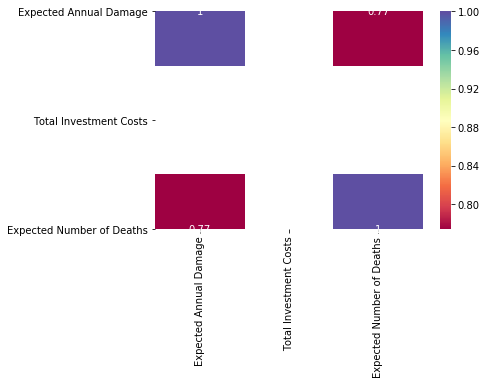

In [60]:

# Make an initial heatmap to see which outcomes should be put into the PairGrids
sns.heatmap(pd.DataFrame(outcomes).corr(),annot=True, cmap= "Spectral")

In [62]:
pd.DataFrame(outcomes)

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,2.539169e+09,0.0,2.062327
1,2.821783e+09,0.0,1.749610
2,2.383714e+09,0.0,1.716772
3,2.806400e+08,0.0,0.433114
4,1.077430e+08,0.0,0.140720
...,...,...,...
495,1.367312e+08,0.0,0.193467
496,1.955809e+09,0.0,2.529515
497,8.364746e+08,0.0,0.836279
498,5.674316e+08,0.0,0.482021


It is practical to create visualizations of the outcomes of experiments to better understand the workings of  the model and gain insights

## 2.1 Histogram Plots

Text here

## 2.1.1 Expected Number of Deaths

In [31]:
def histogram_maker(results, outcome, n=3):
    '''
    This function creates multiple histograms across time and location. 
    Parameters
    ----------
    results : dataframe 
    outcome : str
    n : int (time steps)
    '''

    locations = ["A.1", "A.2", "A.3", "A.4", "A.5"]
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    print("Plot " + str(outcome) + "(Histogram)")
    for step in range(0, n):
        print("This is timestep " + str(step))
        fig, axes = plt.subplots(1, 5, figsize=(10, 3))

        for i, (ax, place) in enumerate(zip(axes.flatten(), locations)):
            #ax.hist(results[str(place) + "_Expected Annual Damage " + str(step)], color=colors[i])
            ax.hist(results[str(place) + "_" + str(outcome) +
                            " " + str(step)], color=colors[i])
            ax.set_xlim(left=0)
            ax.set_title(place)

        plt.tight_layout()
        plt.show()

Plot Expected Number of Deaths(Histogram)
This is timestep 0


KeyError: 'A.1_Expected Annual Damage 0'

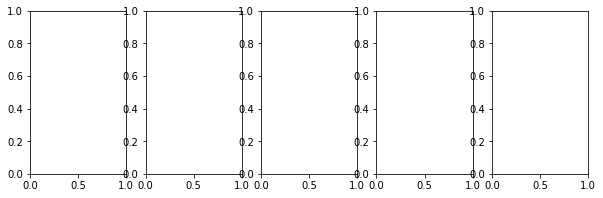

In [57]:
histogram_maker(results_df,"Expected Number of Deaths")

In [6]:
from visualization_functions import (histogram_maker, mean_outcomes, aggregate_outcomes,
                                     scatter_maker, pairplot_maker, boxplot_histogram_maker, boxplot_maker)

ModuleNotFoundError: No module named 'visualization_functions'

In [34]:
def mean_outcomes(results, outcomes):
    '''
    This function makes the mean 
    Parameters
    ----------
    results : dataframe 
    outcomes : list
    '''


#     # Get the mean for all the results across the scenarios to have a quick look at significant locations
    mean_outcomes_df = results.iloc[:, 52:].apply(np.mean, axis=0)

    locations = ["A.1", "A.2", "A.3", "A.4", "A.5"]
    outcomes = outcomes
    x = [0, 1, 2]

    # For the base case it is only necessary to have two plots but if you want to add the costs more plots will be added
    # max 6 outcomes.
    if len(outcomes) == 2:
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 8), sharex=True)
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8, 8), sharex=True)
        axes = axes.flatten()

    # These criteria are not specific to a location
    special_criteria = ["Expected Evacuation Costs", "RfR Total Costs"]

    for ax, criteria in zip(axes, outcomes):
        for step in x:
            for place in locations:
                if criteria == "RfR Total Costs":
                    ax.plot(step, mean_outcomes_df[[
                            str(criteria) + " " + str(step)]].values[0], 'ro', c='y')
                elif criteria == "Expected Evacuation Costs":
                    ax.plot(step, mean_outcomes_df[[
                            str(criteria) + " " + str(step)]].values[0], 'ro', c='y')
                else:
                    if place == "A.1":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="b", label="A.1")
                    elif place == "A.2":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="r", label="A.2")
                    elif place == "A.3":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="g", label="A.3")
                    elif place == "A.4":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="m", label="A.4")
                    elif place == "A.5":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="c", label="A.5")

        ax.set_xlabel("Time Steps")
        ax.set_ylabel(criteria)
        ax.set_title(str(criteria) + "\nOver the Five Locations", y=1.1)
        legend_without_duplicate_labels(ax)

    plt.tight_layout()
    plt.show()

In [35]:
# Select the outcomes you want the mean, for base case the costs are not very interesting.
# outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Expected Evacuation Costs", "RfR Total Costs",
#                 "Dike Investment Costs"]

outcome_names = ["Expected Annual Damage", "Expected Number of Deaths"]

mean_outcomes(results, outcome_names)


TypeError: Categorical cannot perform the operation mean

In [36]:
def pairplot_maker(results, location, n=3):
    '''
    Creates a pairplot maker with only the location and timestep columns.
    Parameters
    ----------
    results : dataframe 
    location : str
    timestep : int
    '''
    list_loc = []
    list_loc_n = []
    n = n-1

    for i in results.columns:
        if location in i:
            list_loc.append(i)
        elif "RfR Total Cost" in i:
            list_loc.append(i)
        elif "Expected Evacuation Costs" in i:
            list_loc.append(i)

    for i in list_loc:
        if str(n) in i:
            list_loc_n.append(i)
        elif "Bmax" in i:
            list_loc_n.append(i)
        elif "Brate" in i:
            list_loc_n.append(i)
        elif "pfail" in i:
            list_loc_n.append(i)

    list_loc_n.append("policy")
    sns.pairplot(results[list_loc_n], hue='policy',
                 vars=results[list_loc_n].iloc[:, :-1].keys())
    plt.tight_layout()
    plt.show()

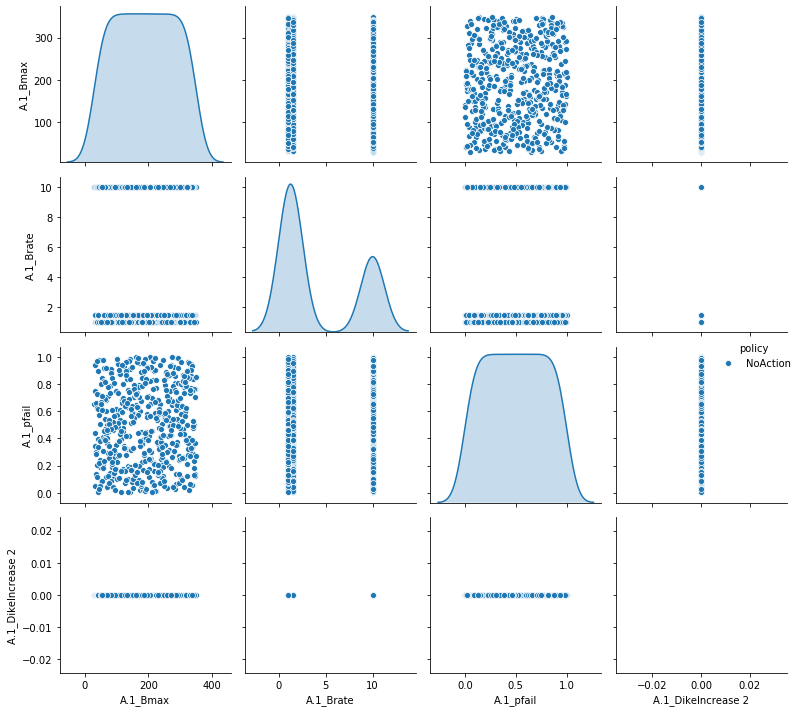

<function __main__.pairplot_maker(results, location, n=3)>

In [40]:
# Takes more time to load than other visualizations
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(pairplot_maker, results=fixed(results_df),
         n=[1, 2, 3], location=["A.1", "A.2", "A.3", "A.4", "A.5"])